In [1]:
from skimage import io
from skimage.color import rgba2rgb, rgb2gray
from matplotlib import pyplot as plt
import numpy as np

In [2]:
img = io.imread("pieces/1.png")
image_gray = rgb2gray(rgba2rgb(img))

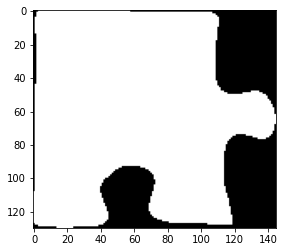

In [3]:
plt.imshow(image_gray, cmap=plt.cm.gray)

In [4]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks


In [5]:
coords = corner_peaks(corner_harris(image_gray), min_distance=2, threshold_rel=0.1)

In [6]:
coords_subpix = corner_subpix(image_gray, coords, window_size=100)

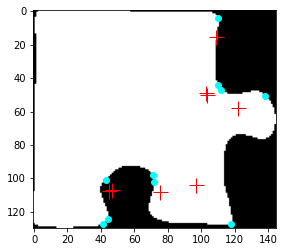

In [7]:
fig, ax = plt.subplots()
ax.imshow(image_gray, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)

In [8]:

from skimage.measure import find_contours

In [9]:
contours = find_contours(image_gray, 0.8)

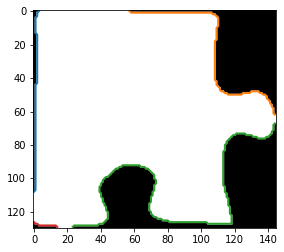

In [10]:
fig, ax = plt.subplots()
ax.imshow(image_gray, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)


In [11]:
image_padded = np.pad(image_gray,20, 'constant', constant_values=(0))

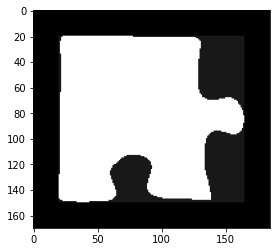

In [12]:
plt.imshow(image_padded, cmap=plt.cm.gray)

In [13]:
coords = corner_peaks(corner_harris(image_padded), min_distance=5, threshold_rel=0.1)

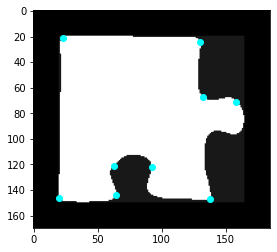

In [14]:
fig, ax = plt.subplots()
ax.imshow(image_padded, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)

In [15]:
contours = find_contours(image_padded, 0.5)

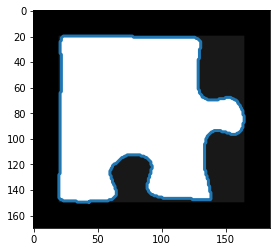

In [16]:
fig, ax = plt.subplots()
ax.imshow(image_padded, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=3)


In [17]:
len(contours)

1

In [18]:
contours[0]

array([[149.42467923,  43.        ],
       [149.42467923,  42.        ],
       [149.42467923,  41.        ],
       ...,
       [148.46965299,  44.        ],
       [149.        ,  43.46965299],
       [149.42467923,  43.        ]])

In [19]:
from skimage.measure import CircleModel

In [20]:
model = CircleModel()
model.estimate(contours[0])

True

In [21]:
model.params

(81.62307710943821, 80.98691736080156, 67.59878628869514)

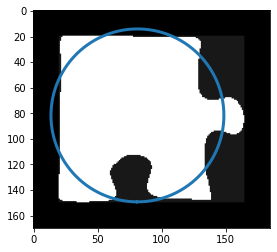

In [38]:
import math

fig, ax = plt.subplots()
ax.imshow(image_padded, cmap=plt.cm.gray)

x_center, y_center, r = model.params
xs = []
ys = []
for i in range(360):
    angle = i/360 * 2* math.pi
    xs.append( np.cos(angle)*r + x_center)
    ys.append( np.sin(angle)*r + y_center)
ax.plot(ys, xs, linewidth=3)


In [39]:
x, y = contours[0][0]
np.arctan2(y - y_center, x - x_center)

-0.5106906269325384

In [40]:
from enum import Enum

# The value here is meaningful, it's the times we need to rotate 90 degrees
class Direction(Enum):
    Top = 0
    Left = 1
    Bottom = 2
    Right = 3

def get_direction(x, y):
    """
    Smaller y is at the top, larger x is at the right
    """
    angle = np.arctan2(y - y_center, x - x_center)
    positive_135 = np.pi *0.75
    negative_135 = - positive_135
    positive_45 = np.pi * 0.25
    negative_45 = - positive_45
    if angle >= positive_135 or angle < negative_135:
        return Direction.Left
    elif positive_45 <= angle < positive_135:
        return Direction.Bottom
    elif 0 < angle < positive_45 or 0 >angle >= negative_45:
        return Direction.Right
    else:
        return Direction.Top
        

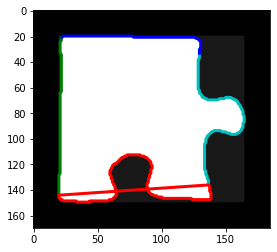

In [41]:
fig, ax = plt.subplots()
ax.imshow(image_padded, cmap=plt.cm.gray)

d = {}

colors = ['b', 'g', 'r', 'c']

contour = contours[0]

for direction in [Direction.Left, Direction.Right, Direction.Top, Direction.Bottom]:
    d[direction] = np.array([[y, x] for y, x in contour if get_direction(x, y) == direction])

for direction in d.keys():
    ax.plot(d[direction][:, 1], d[direction][:,0], linewidth=3,color= colors[direction.value])


In [42]:
top  = d[Direction.Top]

In [43]:
top_normalized = top - np.mean(top, axis=0)

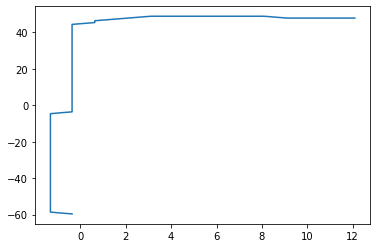

In [44]:
plt.plot(top_normalized[:, 0], top_normalized[:, 1] )

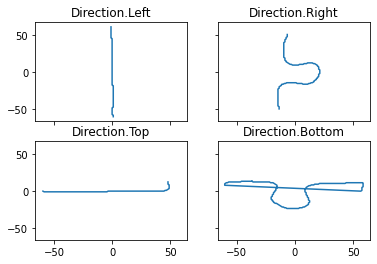

In [48]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
ax = axes.ravel()
for i, (direction, coords) in enumerate(d.items()):
    normalized = coords -  np.mean(coords, axis=0)
    ax[i].plot( normalized[:, 1], normalized[:, 0])
    ax[i].set_title(direction)
plt.show()

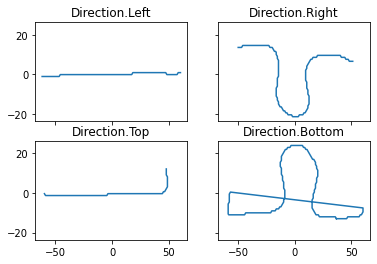

In [54]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
ax = axes.ravel()
for i, (direction, coords) in enumerate(d.items()):
    normalized = coords -  np.mean(coords, axis=0)
    rotation_times = direction.value
    cos = np.cos((np.pi / 2) * rotation_times)
    sin = np.sin((np.pi / 2) * rotation_times)
    rotated = np.dot(normalized, np.array([[cos, -sin], [sin, cos]]))
    ax[i].plot(rotated[:, 1] , rotated[:, 0])
    ax[i].set_title(direction)
plt.show()